### Name:
Earthquake Severity Prediction Model

### Title:
Early Warning System for Earthquakes

### Objective:

The primary goal of this project is to create a robust machine learning model that accurately predicts earthquake severity. The model will leverage seismic data, geographical features, and historical records obtained through Google Data search and USGS.gov (web scraping).The objective is to develop a highly accurate and reliable predictive tool. The intended outcome is to enhance earthquake preparedness and response strategies in high-risk areas by providing early warnings based on the model's predictions. This initiative aims to mitigate the impact of unpredictable natural disasters, potentially saving lives and minimizing damages.


In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df= pd.read_csv('earthquake_1995-2023.csv')
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [6]:
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        551
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [7]:
df["alert"].value_counts()

green     353
yellow     59
orange     24
red        13
Name: alert, dtype: int64

In [8]:
df["alert"] = df["alert"].fillna("red")


In [9]:
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert          0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       6
continent    716
country      349
dtype: int64

In [10]:
df.drop(columns=['continent'], inplace=True)

In [11]:
df.drop(columns=['country'], inplace=True)

In [12]:
df.drop(columns=['location'], inplace=True)

In [13]:
df.isnull().sum()

title        0
magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
dtype: int64

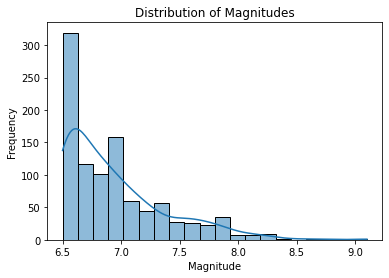

In [14]:
sns.histplot(df['magnitude'], bins=20, kde=True)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Magnitudes')
plt.show()

In [15]:
df

,Name,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,red,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,27-05-1995 13:03,0,9,red,0,776,us,0,0.000000,0.0,mwb,11.000,52.6290,142.8270
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,16-05-1995 20:12,0,4,red,0,912,us,0,0.000000,0.0,mw,20.200,-23.0080,169.9000
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,14-05-1995 11:33,0,6,red,0,732,us,0,0.000000,0.0,mw,11.200,-8.3780,125.1270
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,13-05-1995 08:47,0,9,red,0,670,us,0,0.000000,0.0,mw,14.000,40.1490,21.6950


In [16]:
df["date_time"]=pd.to_datetime(df["date_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      1000 non-null   object        
 1   magnitude  1000 non-null   float64       
 2   date_time  1000 non-null   datetime64[ns]
 3   cdi        1000 non-null   int64         
 4   mmi        1000 non-null   int64         
 5   alert      1000 non-null   object        
 6   tsunami    1000 non-null   int64         
 7   sig        1000 non-null   int64         
 8   net        1000 non-null   object        
 9   nst        1000 non-null   int64         
 10  dmin       1000 non-null   float64       
 11  gap        1000 non-null   float64       
 12  magType    1000 non-null   object        
 13  depth      1000 non-null   float64       
 14  latitude   1000 non-null   float64       
 15  longitude  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(5),

In [17]:
df["date_time"]=pd.DatetimeIndex(df["date_time"]).month

In [18]:
df.describe(include=['object'])

,title,alert,net,magType
count,1000,1000,1000,1000
unique,984,4,11,9
top,"M 6.5 - Kermadec Islands, New Zealand",red,us,mww
freq,3,564,960,502


In [18]:
df.magType.value_counts()

mww    502
mwc    332
mwb    100
mw      51
Mi       5
mb       4
ms       3
md       2
ml       1
Name: magType, dtype: int64

In [20]:
le=LabelEncoder()
alert_le = LabelEncoder()
magtype_le = LabelEncoder()
net_le = LabelEncoder()
df["alert"]=alert_le.fit_transform(df["alert"])
df["magType"]=magtype_le.fit_transform(df["magType"])
df["net"]=net_le.fit_transform(df["net"])
df

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,8,7,4,0,0,657,9,114,7.177000,25.0,8,192.955,-13.8814,167.1580
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,7,8,6,3,0,775,9,92,0.679000,40.0,8,69.727,12.8140,-88.1265
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,7,7,5,0,0,899,9,70,1.634000,28.0,8,171.371,-38.1911,-70.3731
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,7,6,6,0,1,860,9,173,0.907000,36.0,8,32.571,54.3844,-160.6990
4,M 7.3 - Alaska Peninsula,7.3,7,0,5,2,1,820,1,79,0.879451,172.8,0,21.000,54.4900,-160.7960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"M 7.1 - 85 km S of Tungor, Russia",7.1,5,0,9,2,0,776,9,0,0.000000,0.0,6,11.000,52.6290,142.8270
996,"M 7.7 - 249 km E of Vao, New Caledonia",7.7,5,0,4,2,0,912,9,0,0.000000,0.0,5,20.200,-23.0080,169.9000
997,"M 6.9 - 27 km NNW of Maubara, Timor Leste",6.9,5,0,6,2,0,732,9,0,0.000000,0.0,5,11.200,-8.3780,125.1270
998,"M 6.6 - 10 km W of Aianí, Greece",6.6,5,0,9,2,0,670,9,0,0.000000,0.0,5,14.000,40.1490,21.6950


In [20]:
df.corr()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude
magnitude,1.000000,0.037665,0.163170,0.282275,0.128771,-0.001213,0.512358,-0.092200,0.091427,-0.081518,-0.087029,0.039769,0.017083,-0.017505,-0.010710
date_time,0.037665,1.000000,0.020407,-0.004165,0.038805,-0.017758,0.015574,-0.047896,0.024549,0.004845,0.049645,-0.041982,-0.026884,0.009315,0.007353
cdi,0.163170,0.020407,1.000000,0.197458,-0.142914,0.292202,0.479911,-0.072677,-0.003857,0.140505,0.277689,0.364859,-0.051331,0.065383,-0.132190
mmi,0.282275,-0.004165,0.197458,1.000000,0.401446,-0.175441,0.398149,-0.092208,0.110260,-0.307331,-0.068503,-0.088883,-0.517002,0.180799,-0.019398
alert,0.128771,0.038805,-0.142914,0.401446,1.000000,-0.567999,0.162161,-0.060643,0.401044,-0.505868,-0.125896,-0.424028,-0.245834,0.201746,0.080392
tsunami,-0.001213,-0.017758,0.292202,-0.175441,-0.567999,1.000000,0.024848,-0.027380,-0.426026,0.443179,0.236259,0.372177,0.070705,-0.127002,-0.131340
sig,0.512358,0.015574,0.479911,0.398149,0.162161,0.024848,1.000000,-0.189131,0.016636,-0.051440,0.158853,0.067219,-0.079263,0.177575,-0.164200
net,-0.092200,-0.047896,-0.072677,-0.092208,-0.060643,-0.027380,-0.189131,1.000000,0.105831,0.082110,-0.177788,0.332509,0.050231,-0.262491,0.253618
nst,0.091427,0.024549,-0.003857,0.110260,0.401044,-0.426026,0.016636,0.105831,1.000000,-0.402445,0.003023,-0.139414,-0.103897,0.109991,0.156543
dmin,-0.081518,0.004845,0.140505,-0.307331,-0.505868,0.443179,-0.051440,0.082110,-0.402445,1.000000,0.091388,0.350700,0.192698,-0.239791,-0.075595


### Correlation heatmap

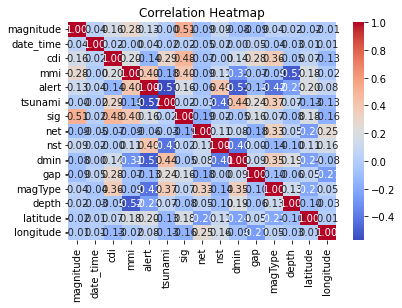

In [21]:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

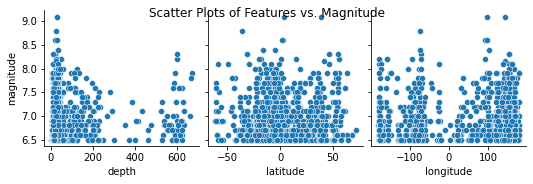

In [22]:
# Scatter plots to explore the relationship
sns.pairplot(df, x_vars=['depth', 'latitude', 'longitude'], y_vars='magnitude', kind='scatter')
plt.suptitle('Scatter Plots of Features vs. Magnitude')
plt.show()

In [23]:
!pip install folium

In [21]:
import folium

In [22]:
# Create a map centered at a specific location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)

In [23]:
# Add markers for earthquake locations
for i, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=f"Magnitude: {row['magnitude']}").add_to(m)

m.save('earthquake_map.html')

In [26]:
print("Column: magnitude")
print(f"Min magnitude: {df['magnitude'].min()}")
print(f"Max magnitude: {df['magnitude'].max()}")
print(f"Mean magnitude: {df['magnitude'].mean()}")

Column: magnitude
Min magnitude: 6.5
Max magnitude: 9.1
Mean magnitude: 6.9401500000000125


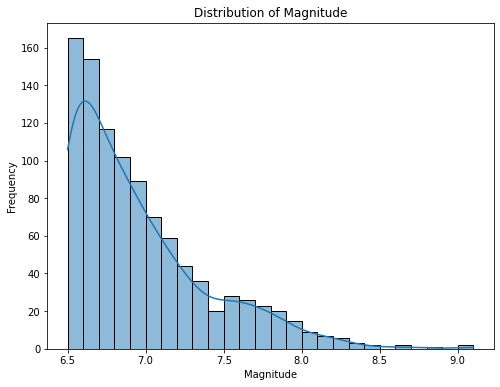

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(df['magnitude'], kde=True)
plt.title('Distribution of Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

array([[<AxesSubplot:title={'center':'magnitude'}>,
        <AxesSubplot:title={'center':'date_time'}>,
        <AxesSubplot:title={'center':'cdi'}>,
        <AxesSubplot:title={'center':'mmi'}>],
       [<AxesSubplot:title={'center':'alert'}>,
        <AxesSubplot:title={'center':'tsunami'}>,
        <AxesSubplot:title={'center':'sig'}>,
        <AxesSubplot:title={'center':'net'}>],
       [<AxesSubplot:title={'center':'nst'}>,
        <AxesSubplot:title={'center':'dmin'}>,
        <AxesSubplot:title={'center':'gap'}>,
        <AxesSubplot:title={'center':'magType'}>],
       [<AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>, <AxesSubplot:>]],
      dtype=object)

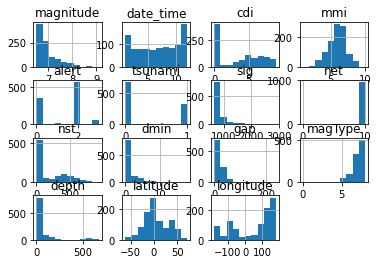

In [28]:
df.hist()

In [29]:
x=df.iloc[:,[1,2,3,4,6,7,8,9,10,11,12,13,14]]
y=df.iloc[:,[5]]

In [30]:
df["tsunami"].value_counts()

0    675
1    325
Name: tsunami, dtype: int64

In [32]:
#!pip install imbalanced-learn --user

In [33]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [34]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x_data)

In [35]:
x_scaled

array([[-1.14291124,  0.4958092 ,  0.45721495, ...,  0.45831967,
         1.20805329, -0.91948351],
       [-1.14291124,  0.16951236,  0.77216974, ...,  0.45831967,
         0.08213232,  0.15767475],
       [-0.90568458,  0.16951236,  0.45721495, ...,  0.45831967,
         1.0108426 , -1.90037887],
       ...,
       [ 0.47880899,  0.4958092 ,  0.45721495, ...,  0.45831967,
        -0.21976882,  0.26538071],
       [-1.04211861, -0.15678447,  0.14226016, ...,  0.45831967,
        -0.42453644,  0.53667689],
       [ 1.26929757, -1.13567498,  0.45721495, ...,  0.45831967,
         0.60528571, -0.72762365]])

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,random_state=11,test_size=0.2)

In [37]:
from sklearn.linear_model import LogisticRegression 
l1=LogisticRegression()
l1.fit(x_train,y_train)

C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [38]:
y_pred=l1.predict(x_test)
y_pred

array([2, 2, 3, 2, 2, 1, 0, 2, 2, 0, 2, 3, 0, 1, 2, 2, 1, 2, 2, 1, 0, 3,
       1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 3, 1, 2, 1, 0, 2, 3, 2, 2, 2,
       0, 0, 2, 0, 1, 1, 3, 2, 1, 0, 2, 3, 3, 3, 0, 0, 2, 2, 0, 2, 3, 2,
       3, 1, 1, 3, 0, 1, 0, 0, 1, 3, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1,
       0, 1, 3, 1, 0, 2, 0, 1, 2, 2, 2, 3, 1, 3, 3, 3, 0, 1, 1, 0, 1, 1,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 0, 0, 1, 3, 1, 0, 3, 1, 2, 3, 3, 2, 0,
       0, 2, 2, 2, 1, 2, 2, 3, 0, 3, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 3, 3,
       1, 2, 3, 1, 3, 0, 3, 0, 3, 1, 3, 2, 2, 3, 0, 2, 0, 2, 2, 3, 1, 2,
       2, 2, 0, 0, 0, 3, 3, 2, 2, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 1, 3,
       0, 2, 1, 1, 1, 1, 3, 3, 0, 1, 2, 1, 1, 3, 1, 1, 3, 0, 1, 2, 1, 1,
       3, 2, 1, 2, 0, 0, 2, 1, 3, 3, 0, 3, 0, 1, 3, 0, 1, 2, 0, 3, 0, 0,
       1, 3, 3, 0, 3, 1, 3, 0, 3, 1, 3, 2, 3, 0, 1, 3, 3, 3, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 3, 0, 1, 3, 3, 3, 1, 2, 1, 1, 2, 3, 1, 3, 1, 2,
       1, 0, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 1, 1,

In [39]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)*100
ac

82.96460176991151

In [40]:
from sklearn.svm import SVC 
SVM=SVC(kernel="linear",random_state=2)
SVM.fit(x_train,y_train)

C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=2)

In [41]:
y_pred1=SVM.predict(x_test)
y_pred1


array([2, 2, 3, 2, 2, 1, 0, 2, 2, 0, 2, 3, 0, 1, 2, 2, 1, 2, 2, 1, 0, 3,
       1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 3, 1, 2, 1, 0, 2, 3, 2, 2, 2,
       0, 0, 2, 0, 1, 1, 3, 2, 1, 0, 2, 2, 3, 3, 0, 0, 2, 2, 0, 2, 3, 2,
       3, 1, 1, 3, 0, 3, 0, 0, 1, 3, 2, 2, 3, 0, 2, 0, 1, 1, 1, 1, 2, 1,
       3, 1, 3, 1, 0, 2, 0, 1, 2, 2, 2, 3, 1, 3, 3, 3, 0, 1, 1, 0, 1, 1,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 0, 3, 1, 3, 1, 0, 3, 1, 2, 3, 3, 2, 3,
       0, 2, 2, 2, 1, 2, 2, 3, 0, 3, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 3, 3,
       1, 2, 3, 1, 3, 0, 3, 3, 3, 1, 3, 2, 2, 3, 0, 2, 0, 2, 2, 3, 1, 2,
       2, 2, 0, 0, 0, 3, 3, 2, 2, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 1, 0,
       0, 2, 1, 1, 1, 1, 3, 1, 0, 1, 2, 1, 1, 3, 1, 1, 0, 0, 1, 2, 1, 1,
       3, 2, 1, 2, 0, 0, 2, 1, 3, 3, 0, 3, 0, 1, 3, 0, 1, 2, 0, 3, 0, 3,
       1, 3, 3, 0, 3, 1, 3, 0, 3, 1, 3, 2, 3, 0, 1, 3, 3, 3, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 3, 0, 1, 3, 3, 3, 1, 2, 1, 1, 2, 3, 1, 3, 1, 2,
       1, 0, 3, 3, 3, 3, 0, 3, 0, 3, 2, 3, 3, 1, 1,

In [42]:
ac1=accuracy_score(y_test,y_pred1)*100
ac1

84.95575221238938

In [43]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [44]:
y_pred2=nb.predict(x_test)
y_pred2

array([2, 2, 3, 2, 2, 1, 0, 2, 2, 0, 2, 3, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 3, 3, 2, 1, 0, 2, 1, 2, 2, 2,
       0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 3, 3, 0, 0, 2, 2, 0, 2, 3, 2,
       3, 1, 1, 0, 0, 1, 3, 0, 1, 3, 2, 2, 0, 0, 2, 0, 3, 1, 1, 1, 2, 1,
       0, 1, 1, 3, 0, 2, 0, 1, 2, 2, 2, 1, 1, 3, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 0, 1, 0, 1, 2, 3, 0, 3, 0, 0, 1, 3, 1, 0, 3, 1, 2, 0, 3, 2, 3,
       0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 0, 3, 0, 1,
       1, 2, 3, 1, 3, 0, 3, 3, 1, 1, 1, 2, 2, 3, 0, 2, 0, 2, 2, 3, 1, 2,
       2, 2, 0, 0, 0, 3, 1, 2, 2, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 1, 1, 3,
       0, 2, 1, 1, 1, 1, 3, 1, 0, 1, 2, 1, 1, 3, 1, 1, 2, 0, 1, 2, 1, 1,
       1, 2, 1, 2, 0, 0, 2, 1, 1, 3, 3, 0, 0, 1, 3, 0, 1, 2, 0, 3, 3, 3,
       1, 1, 0, 3, 3, 1, 3, 0, 3, 1, 1, 2, 3, 0, 1, 0, 1, 3, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 3, 3, 3, 2, 1, 1, 2, 1, 1, 3, 1, 0,
       1, 0, 3, 3, 0, 3, 0, 3, 0, 3, 2, 3, 1, 1, 1,

In [45]:
ac2=accuracy_score(y_test,y_pred2)*100
ac2

76.99115044247787

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train) 

DecisionTreeClassifier()

In [47]:
y_pred3=dt.predict(x_test)
y_pred3

array([2, 2, 3, 2, 3, 1, 0, 2, 2, 0, 2, 3, 0, 1, 2, 2, 1, 2, 2, 1, 0, 3,
       1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 1, 1, 3, 3, 2, 3, 0, 2, 1, 2, 2, 2,
       0, 0, 3, 0, 1, 1, 3, 2, 1, 0, 2, 2, 3, 1, 0, 0, 2, 0, 3, 2, 3, 2,
       3, 1, 1, 3, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 3, 1, 3, 3, 3, 3, 1, 1, 0, 1, 1,
       0, 3, 1, 0, 1, 2, 0, 3, 3, 3, 3, 1, 3, 1, 0, 3, 3, 2, 3, 1, 2, 3,
       3, 2, 2, 2, 1, 0, 2, 3, 0, 3, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 3, 3,
       3, 2, 3, 3, 3, 0, 3, 3, 1, 1, 3, 2, 3, 3, 0, 2, 0, 2, 2, 3, 1, 2,
       2, 2, 0, 0, 0, 3, 1, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 2, 1, 1, 1, 1, 3, 3, 0, 2, 2, 1, 1, 3, 1, 1, 2, 0, 1, 2, 1, 0,
       3, 2, 1, 2, 0, 0, 2, 2, 3, 3, 3, 3, 0, 1, 3, 0, 1, 2, 0, 3, 3, 3,
       1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 3, 0, 3, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 3, 3, 1, 3, 3, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 3, 0, 3, 0, 0, 0, 3, 2, 3, 3, 1, 1,

In [48]:
ac3 = accuracy_score(y_test, y_pred3)*100
ac3

92.92035398230088

In [49]:
from sklearn.ensemble import VotingClassifier
bc=VotingClassifier(estimators=[("logisticRegression",l1),("svm",SVM),("naivebayes",nb),("Decision Tree Classification", dt)])
bc.fit(x_train,y_train)

C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('logisticRegression', LogisticRegression()),
                             ('svm', SVC(kernel='linear', random_state=2)),
                             ('naivebayes', GaussianNB()),
                             ('Decision Tree Classification',
                              DecisionTreeClassifier())])

In [50]:
y_pred4=bc.predict(x_test)
y_pred4

array([2, 2, 3, 2, 2, 1, 0, 2, 2, 0, 2, 3, 0, 1, 2, 2, 1, 2, 2, 1, 0, 3,
       1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 3, 1, 2, 1, 0, 2, 1, 2, 2, 2,
       0, 0, 2, 0, 1, 1, 3, 2, 1, 0, 2, 2, 3, 3, 0, 0, 2, 2, 0, 2, 3, 2,
       3, 1, 1, 3, 0, 1, 0, 0, 1, 3, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 3, 1, 3, 3, 3, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 2, 3, 3, 3, 0, 0, 1, 3, 1, 0, 3, 1, 2, 3, 3, 2, 3,
       0, 2, 2, 2, 1, 2, 2, 3, 0, 3, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 3, 3,
       1, 2, 3, 1, 3, 0, 3, 3, 1, 1, 3, 2, 2, 3, 0, 2, 0, 2, 2, 3, 1, 2,
       2, 2, 0, 0, 0, 3, 1, 2, 2, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 1, 1, 0,
       0, 2, 1, 1, 1, 1, 3, 1, 0, 1, 2, 1, 1, 3, 1, 1, 2, 0, 1, 2, 1, 1,
       3, 2, 1, 2, 0, 0, 2, 1, 3, 3, 0, 3, 0, 1, 3, 0, 1, 2, 0, 3, 0, 3,
       1, 3, 3, 0, 3, 1, 3, 0, 3, 1, 3, 2, 3, 0, 1, 3, 3, 3, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 3, 0, 1, 3, 3, 3, 1, 2, 1, 1, 2, 1, 1, 3, 1, 0,
       1, 0, 3, 3, 0, 3, 0, 3, 0, 3, 2, 3, 3, 1, 1,

In [51]:
from sklearn.metrics import accuracy_score
ac4=accuracy_score(y_test,y_pred4)*100
ac4

86.50442477876106

In [52]:
from sklearn.model_selection import KFold
kf=KFold()
kf.split(x_train,y_train)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [53]:
k= 7
kf = KFold(n_splits=k, shuffle=True)
kf

KFold(n_splits=7, random_state=None, shuffle=True)

In [54]:
from sklearn.model_selection import cross_val_predict
cross_pred=cross_val_predict(bc,x_test,y_test,cv=kf)
cross_pred

C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

array([2, 0, 3, 2, 2, 1, 0, 2, 2, 0, 2, 3, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2,
       1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1, 2, 1, 0, 2, 3, 2, 2, 2,
       0, 3, 2, 0, 1, 1, 3, 2, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 2, 3, 2,
       3, 1, 1, 0, 0, 1, 3, 0, 1, 3, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 3, 1, 3, 3, 3, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 2, 3, 0, 0, 3, 0, 1, 3, 1, 0, 3, 1, 2, 0, 3, 2, 0,
       0, 2, 2, 2, 1, 2, 2, 3, 0, 3, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 3,
       1, 2, 3, 1, 3, 0, 3, 3, 1, 1, 3, 2, 2, 3, 0, 2, 0, 2, 2, 3, 1, 2,
       2, 2, 0, 0, 0, 3, 1, 0, 2, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 1, 1, 3,
       0, 2, 1, 1, 1, 1, 3, 1, 0, 1, 2, 1, 1, 3, 1, 1, 2, 0, 1, 2, 1, 1,
       3, 2, 1, 2, 0, 0, 2, 1, 0, 3, 0, 3, 0, 1, 3, 0, 1, 2, 0, 3, 3, 3,
       1, 0, 3, 3, 3, 1, 3, 0, 3, 1, 1, 2, 1, 0, 1, 3, 3, 3, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 3, 0, 1, 3, 3, 3, 1, 2, 1, 1, 2, 1, 1, 3, 1, 0,
       1, 0, 3, 3, 3, 3, 0, 3, 0, 1, 2, 3, 3, 1, 1,

In [55]:
from sklearn.model_selection import cross_val_score
cross_score=cross_val_score(bc,x_train,y_train,cv=kf)
cross_score

C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TriptiMall\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

array([0.86821705, 0.87984496, 0.86821705, 0.8875969 , 0.86046512,
       0.87159533, 0.87548638])

In [56]:
ac5=cross_score.mean()*100
ac5

87.30603996190821